In [90]:
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
tfkl = tfk.layers

from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation
from tensorflow.keras.layers import BatchNormalization, Flatten, Reshape, Conv2DTranspose, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.python import keras

###1. Autoencoder

In [65]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [67]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [68]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

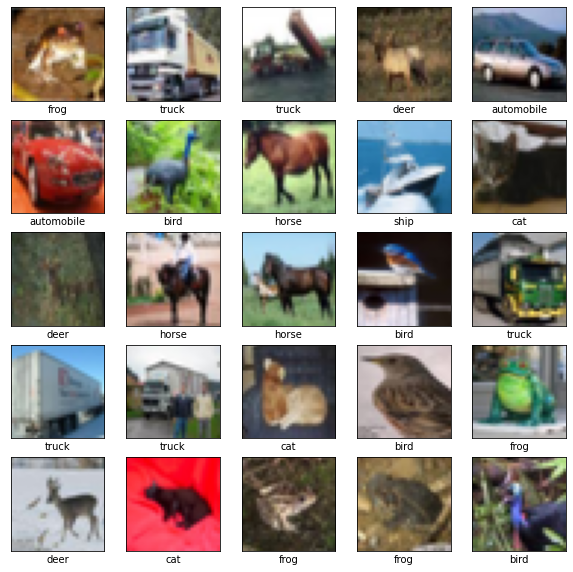

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [73]:
input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

In [86]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')

In [87]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                steps_per_epoch=10,
                validation_data=(x_test, x_test),
                callbacks=[es_cb])

Epoch 1/50
10/10 [==============================] - 25s 3s/step - loss: 0.5780 - accuracy: 0.6803 - val_loss: 0.5859 - val_accuracy: 0.6654
Epoch 2/50
10/10 [==============================] - 25s 2s/step - loss: 0.5772 - accuracy: 0.6857 - val_loss: 0.5823 - val_accuracy: 0.6018
Epoch 3/50
10/10 [==============================] - 25s 2s/step - loss: 0.5780 - accuracy: 0.6935 - val_loss: 0.5803 - val_accuracy: 0.6380
Epoch 4/50
10/10 [==============================] - 25s 2s/step - loss: 0.5792 - accuracy: 0.7038 - val_loss: 0.5802 - val_accuracy: 0.6650
Epoch 5/50
10/10 [==============================] - 25s 3s/step - loss: 0.5747 - accuracy: 0.6919 - val_loss: 0.5804 - val_accuracy: 0.6651
Epoch 6/50
10/10 [==============================] - 25s 3s/step - loss: 0.5774 - accuracy: 0.6831 - val_loss: 0.5809 - val_accuracy: 0.6533
Epoch 00006: early stopping


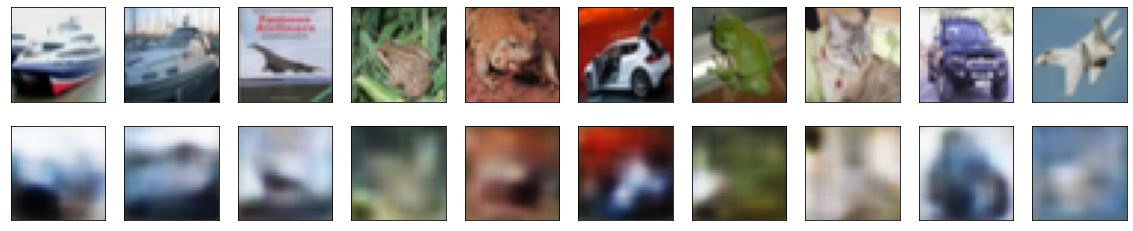

In [88]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

###2. Image Classification

2.1 Deep CNN

In [96]:
cnn = models.Sequential()

cnn.add(tfkl.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(tfkl.MaxPooling2D((2, 2)))
cnn.add(tfkl.Conv2D(64, (3, 3), activation='relu'))
cnn.add(tfkl.MaxPooling2D((2, 2)))
cnn.add(tfkl.Conv2D(64, (3, 3), activation='relu'))
cnn.add(tfkl.Flatten())
cnn.add(tfkl.Dense(64, activation='relu'))
cnn.add(tfkl.Dense(10))

In [97]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5126 - accuracy: 0.4508 - val_loss: 1.3456 - val_accuracy: 0.5193
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1484 - accuracy: 0.5934 - val_loss: 1.0186 - val_accuracy: 0.6364
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9940 - accuracy: 0.6499 - val_loss: 0.9853 - val_accuracy: 0.6509
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8957 - accuracy: 0.6848 - val_loss: 0.9093 - val_accuracy: 0.6823
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8227 - accuracy: 0.7119 - val_loss: 0.8768 - val_accuracy: 0.6962
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7637 - accuracy: 0.7344 - val_loss: 0.9073 - val_accuracy: 0.6851
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7197 - accuracy: 0.7486 - val_loss: 0.9322 -

313/313 - 4s - loss: 0.8666 - accuracy: 0.7085


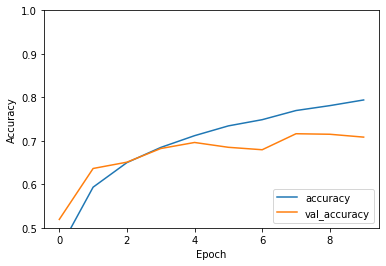

In [98]:
plt.plot(cnn.history.history['accuracy'], label='accuracy')
plt.plot(cnn.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=2)

2.2 Transfer Learning

In [99]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [100]:
base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(10)

In [101]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [102]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [104]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.0861 - accuracy: 0.2554 - val_loss: 1.9806 - val_accuracy: 0.2990
Epoch 2/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.9848 - accuracy: 0.2844 - val_loss: 1.9387 - val_accuracy: 0.3079
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.9641 - accuracy: 0.2894 - val_loss: 1.9232 - val_accuracy: 0.3110
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.9511 - accuracy: 0.2947 - val_loss: 1.9144 - val_accuracy: 0.3142
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.9474 - accuracy: 0.2949 - val_loss: 1.9106 - val_accuracy: 0.3179
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.9455 - accuracy: 0.2951 - val_loss: 1.9080 - val_accuracy: 0.3157
Epoch 7/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.9418 - accuracy: 0.2962 - val_loss: 1.9059 -

313/313 - 9s - loss: 1.9030 - accuracy: 0.3189


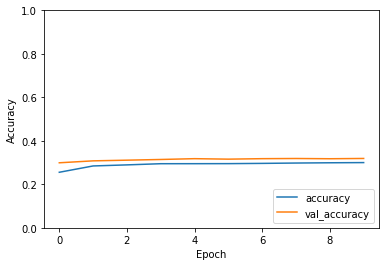

In [106]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

###3. Text Classification

3.1 RNN: Build and train a LSTM model to solve this text classification task. 

In [3]:
import pandas as pd

In [13]:
url = 'https://raw.githubusercontent.com/beixuan-jia/ANLY-590/master/Assignments/SPAM_detection.csv'
df = pd.read_csv(url, sep =',')
df.head(5)

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [107]:
x = df['Message']
y = df['category_val']

In [108]:
x = np.asarray(x)
y = np.asarray(y)

In [109]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [110]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [111]:
vocab_size = len(tokenizer.word_index)+1
sequences = tokenizer.texts_to_sequences(x)
data = pad_sequences(sequences,padding='post')

In [112]:
np.random.seed(2020)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [113]:
data = data[indices]
labels = y[indices]

In [114]:
i = int(5572*0.8)

x_train = data[:i]
y_train = labels[:i]
x_test = data[i:]
y_test = labels[i:]

In [116]:
model1 = Sequential()
model1.add(Embedding(vocab_size, 16, input_length=189))
model1.add(LSTM(128,return_sequences=True))
model1.add(tfkl.GlobalMaxPool1D())
model1.add(Dropout(0.4))
model1.add(Dense(64,activation="relu"))
model1.add(Dropout(0.4))
model1.add(Dense(1,activation="sigmoid"))
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 189, 16)           144080    
_________________________________________________________________
lstm_5 (LSTM)                (None, 189, 128)          74240     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)               

In [117]:
results1 = model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,steps_per_epoch=20,batch_size=32)

Epoch 1/20
20/20 [==============================] - 6s 278ms/step - loss: 0.5488 - accuracy: 0.8359 - val_loss: 0.4259 - val_accuracy: 0.8592
Epoch 2/20
20/20 [==============================] - 5s 260ms/step - loss: 0.3949 - accuracy: 0.8734 - val_loss: 0.4109 - val_accuracy: 0.8592
Epoch 3/20
20/20 [==============================] - 5s 264ms/step - loss: 0.4088 - accuracy: 0.8594 - val_loss: 0.4048 - val_accuracy: 0.8592
Epoch 4/20
20/20 [==============================] - 5s 258ms/step - loss: 0.3935 - accuracy: 0.8766 - val_loss: 0.4027 - val_accuracy: 0.8592
Epoch 5/20
20/20 [==============================] - 5s 261ms/step - loss: 0.3689 - accuracy: 0.8859 - val_loss: 0.3982 - val_accuracy: 0.8592
Epoch 6/20
20/20 [==============================] - 5s 260ms/step - loss: 0.3950 - accuracy: 0.8578 - val_loss: 0.4094 - val_accuracy: 0.8592
Epoch 7/20
20/20 [==============================] - 5s 265ms/step - loss: 0.3019 - accuracy: 0.8784 - val_loss: 0.2636 - val_accuracy: 0.8592
Epoch 

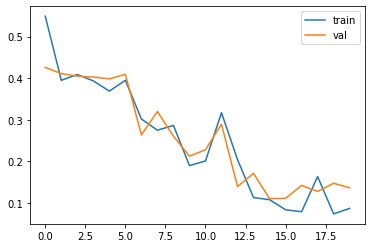

In [119]:
plt.plot(results1.history["loss"])
plt.plot(results1.history["val_loss"])
plt.legend(labels=["train", "val"])

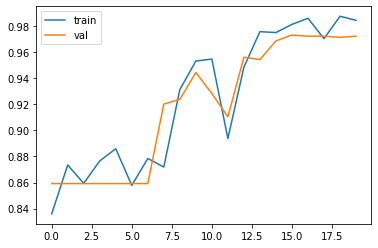

In [120]:
plt.plot(results1.history["accuracy"])
plt.plot(results1.history["val_accuracy"])
plt.legend(labels=["train", "val"])

3.2 CNN

In [121]:
model2 = tfk.Sequential()
model2.add(tfkl.Embedding(vocab_size, 16, input_length=189))
model2.add(tfkl.Conv1D(64, kernel_size = 3,padding='valid',activation='relu',strides=1))
model2.add(tfkl.GlobalMaxPool1D())
model2.add(tfkl.Dropout(0.4))
model2.add(tfkl.Dense(32,activation="relu"))
model2.add(tfkl.Dropout(0.4))
model2.add(tfkl.Dense(1,activation="sigmoid"))
model2.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 189, 16)           144080    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 187, 64)           3136      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)               

In [122]:
results2 = model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,steps_per_epoch=20,batch_size=32)

Epoch 1/20
20/20 [==============================] - 0s 20ms/step - loss: 0.4054 - accuracy: 0.8344 - val_loss: 0.2897 - val_accuracy: 0.8592
Epoch 2/20
20/20 [==============================] - 0s 13ms/step - loss: 0.2145 - accuracy: 0.9219 - val_loss: 0.1516 - val_accuracy: 0.9489
Epoch 3/20
20/20 [==============================] - 0s 13ms/step - loss: 0.1066 - accuracy: 0.9703 - val_loss: 0.1498 - val_accuracy: 0.9570
Epoch 4/20
20/20 [==============================] - 0s 13ms/step - loss: 0.1787 - accuracy: 0.9469 - val_loss: 0.0764 - val_accuracy: 0.9722
Epoch 5/20
20/20 [==============================] - 0s 13ms/step - loss: 0.1075 - accuracy: 0.9688 - val_loss: 0.0698 - val_accuracy: 0.9812
Epoch 6/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0868 - accuracy: 0.9766 - val_loss: 0.0633 - val_accuracy: 0.9812
Epoch 7/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0657 - accuracy: 0.9773 - val_loss: 0.0658 - val_accuracy: 0.9839
Epoch 8/20
20

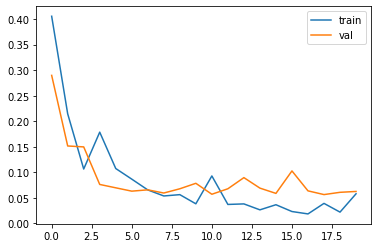

In [123]:
plt.plot(results2.history["loss"])
plt.plot(results2.history["val_loss"])
plt.legend(labels=["train", "val"])

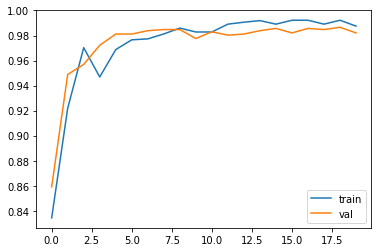

In [125]:
plt.plot(results2.history["accuracy"])
plt.plot(results2.history["val_accuracy"])
plt.legend(labels=["train", "val"])

3.3 Compare ROC Curves

In [126]:
from sklearn.metrics import roc_curve,auc

In [127]:
pred_rnn = model1.predict(x_test)

In [128]:
FP_rate =dict()
TP_rate = dict()
ROC1 = dict()
for i in range(2):
  FP_rate[i],TP_rate[i],_ = roc_curve(y_test,pred_rnn)
  ROC1[i] = auc(FP_rate[i],TP_rate[i])

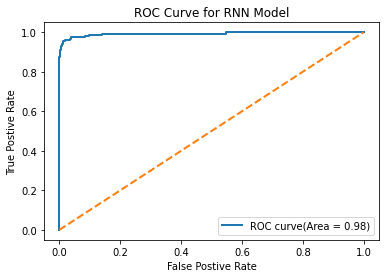

In [134]:
plt.figure()
plt.plot(FP_rate[0],TP_rate[0],lw=2,label='ROC curve(Area = %0.2f)'%ROC1[0])
plt.plot([0,1],[0,1],lw=2,linestyle='--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('ROC Curve for RNN Model')
plt.legend(loc='lower right')
plt.show()

In [131]:
pred_cnn = model2.predict(x_test)

In [132]:
FP_rate =dict()
TP_rate = dict()
ROC2 = dict()
for i in range(2):
  FP_rate[i],TP_rate[i],_ = roc_curve(y_test,pred_cnn)
  ROC2[i] = auc(FP_rate[i],TP_rate[i])

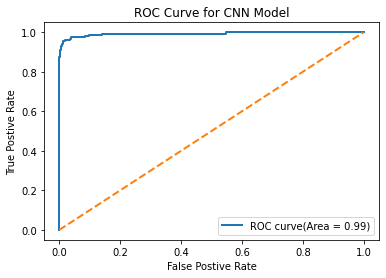

In [133]:
plt.figure()
plt.plot(FP_rate[0],TP_rate[0],lw=2,label='ROC curve(Area = %0.2f)'%ROC2[0])
plt.plot([0,1],[0,1],lw=2,linestyle='--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc='lower right')
plt.show()

Thus, the test accuracy for the Model RNN is slightly higher.